
(50 points) Dimension Reduction for  the breast cancer Wisconsin dataset 

from sklearn import datasets

load data directly into X and y if you just need to load data.

X, y = datasets.load_breast_cancer(return_X_y=True)

(a) (25 points) Use PCA and T-SNE to reduce the dimension to 2. 

(b) (25 points) Plot out the 2 dimensional features for both and discuss the differences between them.

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold
from sklearn import datasets
from sklearn.decomposition import PCA

X,y = datasets.load_breast_cancer(return_X_y=True)

In [27]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

C:\Users\liwtt\AppData\Local\Temp\ipykernel_15956\3063603568.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


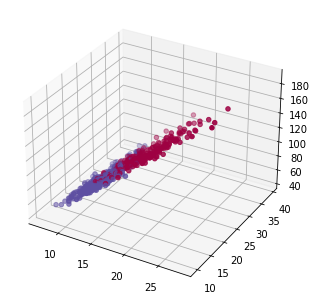

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
plt.show()

Text(0.5, 1.0, 'Projected data')

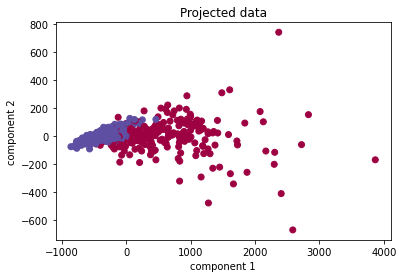

In [29]:
plt.scatter(X_r[:, 0], X_r[:,1],
            c=y, cmap=plt.cm.Spectral)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Projected data')

In [30]:
pca = PCA(n_components=2)
PCA_projected = pca.fit_transform(X.data)

In [31]:
## TSNE

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
TSNE_projected = tsne.fit_transform(X.data)


c:\Users\liwtt\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\liwtt\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [49]:
def draw_components(Y_projected, title):
    plt.scatter(Y_projected[:,0], Y_projected[:, 1],
        c=y,
        edgecolor='none', alpha=0.5,
        cmap=plt.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    #plt.colorbar()
    plt.title(title)


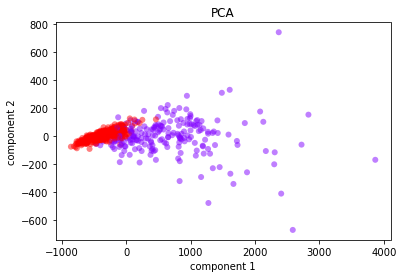

In [50]:
draw_components(PCA_projected, 'PCA')

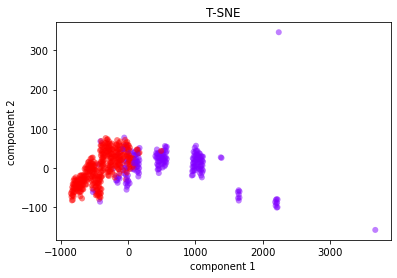

In [51]:
draw_components(TSNE_projected, 'T-SNE')

From these two graphs we can see that T-SNE does a better job of capturing the separation of data. It would be easier to then perform a k-means cluster using the T-SNE plot rather than the PCA one.